In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
infini_gram_df = pd.read_parquet("inf-gram/res.parquet")
llm_result_df = pd.read_parquet("together-ai/snli_with_prediction.parquet")

In [8]:
both_presented = infini_gram_df[(infini_gram_df['premise_count'] > 0) & (infini_gram_df['hypothesis_count'] > 0)]

In [16]:
hypothesis_presented = infini_gram_df[(infini_gram_df['premise_count'] == 0) & (infini_gram_df['hypothesis_count'] > 0)]

In [14]:
premise_presented = infini_gram_df[(infini_gram_df['premise_count'] > 0) & (infini_gram_df['hypothesis_count'] == 0)]

In [21]:
both_not_presented = infini_gram_df[(infini_gram_df['premise_count'] == 0) & (infini_gram_df['hypothesis_count'] == 0)]

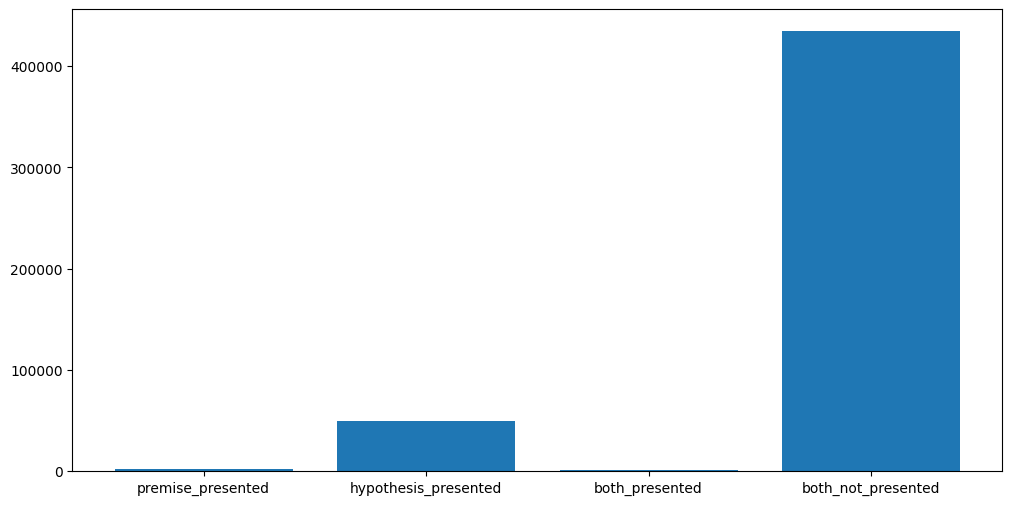

In [23]:
counts = [len(premise_presented), len(hypothesis_presented), len(both_presented), len(both_not_presented)]
plt.figure(figsize=(12, 6))
plt.bar(
    ['premise_presented', 'hypothesis_presented', 'both_presented', 'both_not_presented'],
    counts
)
plt.show()

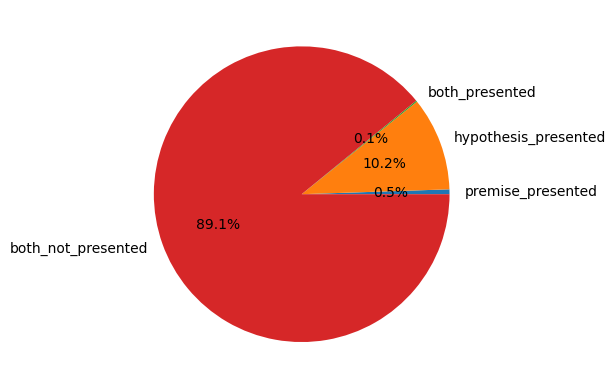

In [26]:
plt.figure()
plt.pie(
    counts,
    labels=['premise_presented', 'hypothesis_presented', 'both_presented', 'both_not_presented'],
    autopct='%1.1f%%'
)
plt.show()

In [29]:
label_id_mapping = {
    "entailment": 0,
    "neutral": 1,
    "contradiction": 2,
    "invalid": -1
}
llm_result_df['label_id'] = llm_result_df['label'].map(label_id_mapping)

In [32]:
llm_result_df_valid = llm_result_df[llm_result_df['label_id'] != -1]

In [34]:
llm_correct = llm_result_df_valid[llm_result_df_valid['label_id'] == llm_result_df_valid['prediction_id']]
llm_incorrect = llm_result_df_valid[llm_result_df_valid['label_id'] != llm_result_df_valid['prediction_id']]

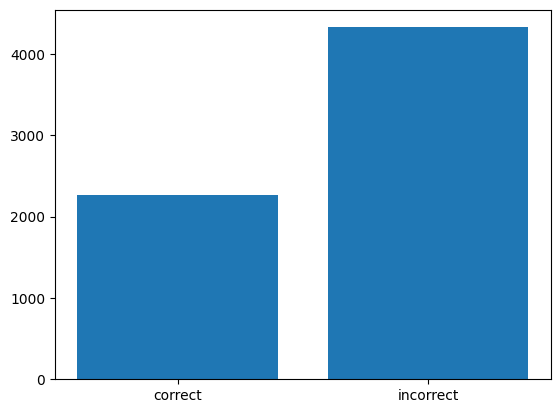

In [36]:
plt.figure()
plt.bar(
    ['correct', 'incorrect'],
    [len(llm_correct), len(llm_incorrect)]
)
plt.show()

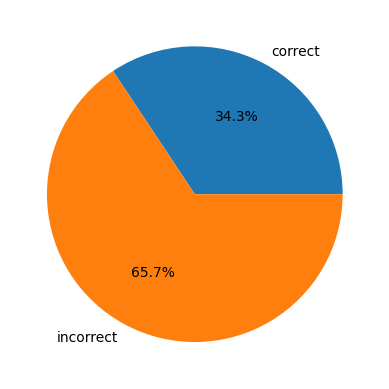

In [42]:
plt.figure()
plt.pie(
    [len(llm_correct), len(llm_incorrect)],
    labels=['correct', 'incorrect'],
    autopct='%1.1f%%'
)
plt.show()

In [74]:
joined_df = llm_result_df_valid.merge(infini_gram_df, left_on='id', right_on='doc_id')

In [75]:
joined_df

,id,timestamp,premise_x,hypothesis_x,label_x,prediction_raw,prediction_id,rationale,label_id,doc_id,premise_y,hypothesis_y,label_y,premise_count,hypothesis_count
0,0,2024-03-01 00:43:07,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,neutral,entailment,0,A person on a horse jumps over a broken down a...,1,0,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,1,2,0
1,1,2024-03-01 00:43:30,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",contradiction,entailment,0,A person on a horse jumps over a broken down a...,2,1,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",2,2,1
2,2,2024-03-01 00:43:36,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",entailment,entailment,0,A: The sentence is a metaphor. The broken down...,0,2,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",0,2,1
3,3,2024-03-01 00:43:40,Children smiling and waving at camera,They are smiling at their parents,neutral,entailment,0,"Explain why ""The man is smiling at the camera""...",1,3,Children smiling and waving at camera,They are smiling at their parents,1,2,1
4,4,2024-03-01 00:43:45,Children smiling and waving at camera,There are children present,entailment,entailment,0,"Explain why ""A man is standing in front of a b...",0,4,Children smiling and waving at camera,There are children present,0,2,159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6586,6596,2024-03-02 02:14:51,A young child in blue sweeps the floors like h...,A child sweeping the floor with a Swiffer.,neutral,entailment,0,A young child in blue sweeps the floors like h...,1,6596,A young child in blue sweeps the floors like h...,A child sweeping the floor with a Swiffer.,1,0,0
6587,6597,2024-03-02 02:14:56,A young man does exercises in his fencing class.,The man only uses guns.,contradiction,entailment,0,"Explain why ""A young man does exercises in his...",2,6597,A young man does exercises in his fencing class.,The man only uses guns.,2,0,0
6588,6598,2024-03-02 02:15:00,A young man does exercises in his fencing class.,The man is athletic.,neutral,entailment,0,"Explain why ""A young man does exercises in his...",1,6598,A young man does exercises in his fencing class.,The man is athletic.,1,0,0
6589,6599,2024-03-02 02:15:05,A young man does exercises in his fencing class.,The man has held a sword.,entailment,entailment,0,"Explain why ""A young man does exercises in his...",0,6599,A young man does exercises in his fencing class.,The man has held a sword.,0,0,0


In [81]:
both_presented_and_correct = joined_df[
    (joined_df['premise_count'] > 0) & (joined_df['hypothesis_count'] > 0) & (joined_df['label_id'] == joined_df['prediction_id'])
]
both_presented_joined = joined_df[
    (joined_df['premise_count'] > 0) & (joined_df['hypothesis_count'] > 0)
]
correct_rate_both_presented = len(both_presented_and_correct) / len(both_presented_joined)

In [82]:
both_presented_and_incorrect = joined_df[
    (joined_df['premise_count'] > 0) & (joined_df['hypothesis_count'] > 0) & (joined_df['label_id'] != joined_df['prediction_id'])
]
incorrect_rate_both_presented = len(both_presented_and_incorrect) / len(both_presented_joined)

In [84]:
premise_presented_and_correct = joined_df[
    (joined_df['premise_count'] > 0) & (joined_df['hypothesis_count'] == 0) & (joined_df['label_id'] == joined_df['prediction_id'])
]
premise_presented_joined = joined_df[
    (joined_df['premise_count'] > 0) & (joined_df['hypothesis_count'] == 0)
]
correct_rate_premise_presented = len(premise_presented_and_correct) / len(premise_presented_joined)

In [85]:
hypothesis_presented_and_correct = joined_df[
    (joined_df['premise_count'] == 0) & (joined_df['hypothesis_count'] > 0) & (joined_df['label_id'] == joined_df['prediction_id'])
]
hypothesis_presented_joined = joined_df[
    (joined_df['premise_count'] == 0) & (joined_df['hypothesis_count'] > 0)
]
correct_rate_hypothesis_presented = len(hypothesis_presented_and_correct) / len(hypothesis_presented_joined)

In [87]:
both_not_presented_and_correct = joined_df[
    (joined_df['premise_count'] == 0) & (joined_df['hypothesis_count'] == 0) & (joined_df['label_id'] == joined_df['prediction_id'])
]
both_not_presented_joined = joined_df[
    (joined_df['premise_count'] == 0) & (joined_df['hypothesis_count'] == 0)
]
correct_rate_both_not_presented = len(both_not_presented_and_correct) / len(both_not_presented_joined)

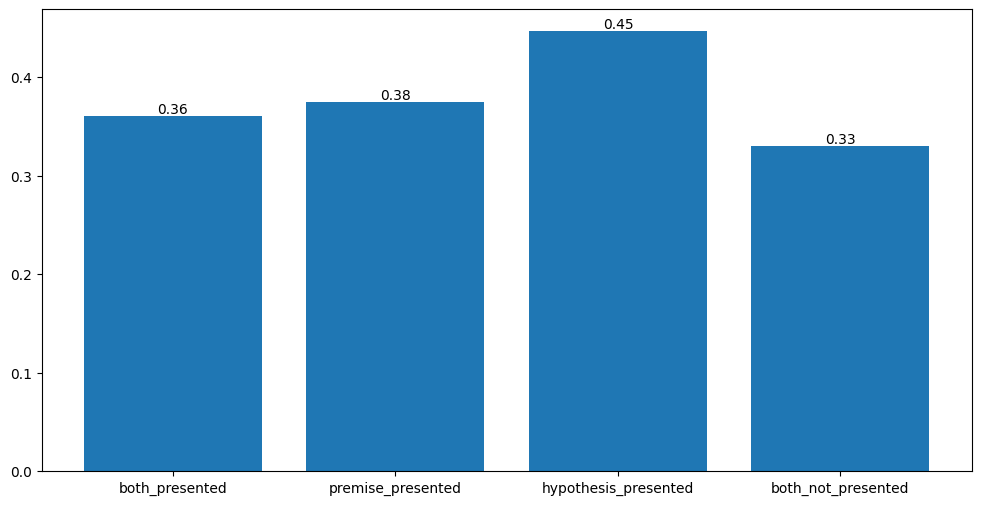

In [91]:
plt.figure(figsize=(12, 6))
plt.bar(
    ['both_presented', 'premise_presented', 'hypothesis_presented', 'both_not_presented'],
    [correct_rate_both_presented, correct_rate_premise_presented, correct_rate_hypothesis_presented, correct_rate_both_not_presented]
)
for i, v in enumerate([correct_rate_both_presented, correct_rate_premise_presented, correct_rate_hypothesis_presented, correct_rate_both_not_presented]):
    plt.text(i, v, f"{v:.2f}", ha='center', va='bottom')
plt.show()

In [90]:
print(f"both_presented_joined: {len(both_presented_joined)}, both_presented_and_correct: {len(both_presented_and_correct)}")
print(f"premise_presented_joined: {len(premise_presented_joined)}, premise_presented_and_correct: {len(premise_presented_and_correct)}")
print(f"hypothesis_presented_joined: {len(hypothesis_presented_joined)}, hypothesis_presented_and_correct: {len(hypothesis_presented_and_correct)}")
print(f"both_not_presented_joined: {len(both_not_presented_joined)}, both_not_presented_and_correct: {len(both_not_presented_and_correct)}")

both_presented_joined: 25, both_presented_and_correct: 9
premise_presented_joined: 80, premise_presented_and_correct: 30
hypothesis_presented_joined: 712, hypothesis_presented_and_correct: 318
both_not_presented_joined: 5774, both_not_presented_and_correct: 1905
